<a href="https://colab.research.google.com/github/Ansebi/Hello_LSTM/blob/main/20220811_hello_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# How to plot a scatter

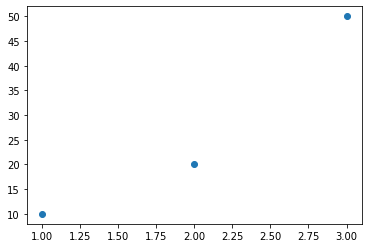

In [2]:
x = [1,2,3]
y = [10,20,50]
plt.scatter(x=x, y=y)
plt.show()

# Generate $sin(x)$-based time series

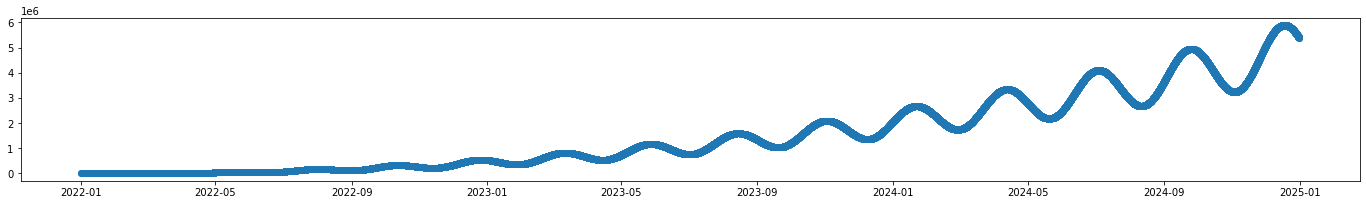

In [51]:
n_years = 3
alpha = 1/6
beta = 0.9
amplitude = 1
elevation_power = 2.2
amplitude_change_power = 2
period_starts = pd.Timestamp('2022-01-01')

duration_days = 365*n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

x = np.linspace(1, duration_days, duration_days*24)
y = x**elevation_power
y += amplitude*x**amplitude_change_power*np.sin(x**beta*alpha)
x_date = pd.date_range(period_starts, period_ends, freq='H')[:-1]
plt.figure(figsize=(24,3))
plt.scatter(x=x_date, y=y)
plt.show()

In [33]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

# Test Forecaster

In [ ]:
! pip install scalecast

In [36]:
from scalecast.Forecaster import Forecaster

In [52]:
f = Forecaster(y=y[:650], current_dates=x_date[:650])

In [54]:
f

Forecaster(
    DateStartActuals=2022-01-01T00:00:00.000000000
    DateEndActuals=2022-01-28T01:00:00.000000000
    Freq=H
    N_actuals=650
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [ ]:
f.set_test_length(12)
f.generate_future_dates(35*24)
f.set_estimator('lstm')

In [60]:
f.set_test_length(30*24)
f.generate_future_dates((len(y)-650)*24)
f.set_estimator('lstm')

In [61]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

ValueError: ignored